###### Content under Creative Commons Attriubtion license CC-BY 4.0, code under MIT license (c)2015 Ye Qin.

# The Fisher-Kolmogorov equation

The Fisher-Kolmogorov equation (also known as KPP equation or Fisher's equation) has a form of
$$
\frac{\partial u}{\partial t}=ru(1-u)+D\frac{\partial u^2 }{\partial x^2}
$$
It can be used in many fields such as economy, chemistry, and so on.

## Discretizing our model equation

In our model, the Fisher's equation is used to describe the diffusion of an epidemic in a population in a 1-D space. Denote $n(x,t)$ the density of infected individuals, the model is formulated as: 
$$
\frac{\partial n}{\partial t}=r(1-\frac{n}{K})n+\chi\frac{\partial n^2 }{\partial x^2}
\tag{1}
$$
where $t$ is time, $x$ is space, $r$ is rate of growth, $K$ is carrying capacity, and $\chi$ is diffusivity.
Eq. (1) seems complex. We can simplify it by using dimensionless variable. Let $u=\frac{n} {K}$, $\tilde{t}=rt$, and $\tilde{x}=\sqrt{\frac{r}{\chi}}x$. Then, Eq. (1) can be rewritten as 
$$
\frac{\partial u}{\partial \tilde{t}}=(1-u)u+\frac{\partial u^2 }{\partial \tilde{x}^2}
\tag{2}
$$
For convenience, we drop the notation $\tilde{}$ in the following.

We establish the discrete system as:
$$
x_{i} = i\Delta x \quad  \quad t^{n}= n\Delta t
$$
$$
u_{i}^{n} = u(i\Delta x, n\Delta t)
$$

Choose Patankar scheme for the non-linear term, which means $\frac{\partial u}{\partial t}=u(1-u)$ is approximated as
$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=u_{i}^{n}(1-u_{i}^{n+1})
$$
Use forward-difference in time and central-difference in space, the partial differential part is approximated as
$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\frac{u_{i-1}^{n}-2u_{i}^{n}+u_{i+1}^{n}}{\Delta x^2}
$$
Combine them, the discrete form of Eq. 2 is
$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=u_{i}^{n}(1-u_{i}^{n+1})+\frac{u_{i-1}^{n}-2u_{i}^{n}+u_{i+1}^{n}}{\Delta x^2}
$$
Put $u_{i}^{n+1}$ on the left-hand side ofthe equation and put the others on the right-hand side, we get
$$
u_{i}^{n+1}=(1+\Delta tu_{i}^{n})(u_{i}^{n}+\Delta t u_{i}^{n}+\frac{u_{i-1}^{n}-2u_{i}^{n}+u_{i+1}^{n}}{\Delta x^2})
$$
The stability criterion is $\sigma=\frac{\Delta t}{\Delta x^2}<0.5$.

## Compute!

First, define the initial and boundary conditions. They are defined as
\begin{equation}
u(x,0)=\begin{cases}1 & x=0\\
0 & 0<x<L
\end{cases}
\end{equation}
The length of the space $L$ is 150.

In [1]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# Parameters

L = 150             # Length
nx = 1200            # Number of grid points in space
dx = L/nx           # Space step
T = 56              # Period of time
sigma = 0.49        # To meet the stability criterion
dt = sigma*dx**2    # Time step

x = numpy.linspace(0,L,nx) # Define the space grid

Define the initial condition.

In [3]:
def initial():
    u = numpy.zeros(nx)
    u[0]=1
    return u

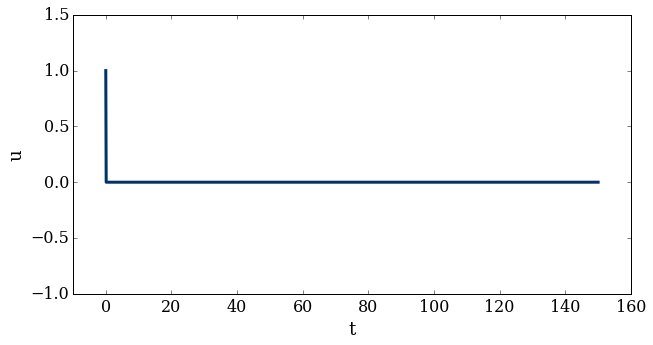

In [4]:
# How does it look like?
u = initial()
pyplot.figure(figsize=(10,5));
pyplot.plot(x, u, color='#003366', ls='-', lw=3)
pyplot.ylim(-1,1.5);
pyplot.xlim(-10,160);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'u', fontsize=18);

In [5]:
def fisher(T,dt):
    """
    Solve the Fisher's equation
    
    Parameters
    ----------
    T : The period of time
    
    dt : time step
    ----------
    Produce a plot of the result
    """
    
    u = initial()       # Input the initial condition
    nt = int(T/dt)      # Number of grid points in time
        
    for n in range (nt):
        un = u.copy()
        u[1:-1] = (un[1:-1] + dt*un[1:-1]+dt/dx**2*(un[:-2]-2*un[1:-1]+un[2:]))/(1+dt*un[1:-1])
    
    # Plot the result
    pyplot.figure(figsize=(10,5));
    pyplot.plot(x, u, color='#003366', ls='-', lw=3)
    pyplot.ylim(-1,1.5);
    pyplot.xlim(-10,160);
    pyplot.xlabel(r'x', fontsize=18);
    pyplot.ylabel(r'u', fontsize=18);
    
    
        

Then, we can try some different $T$.

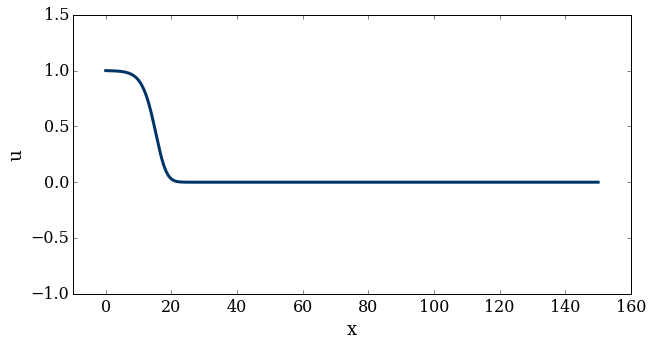

In [6]:
fisher(10,dt)

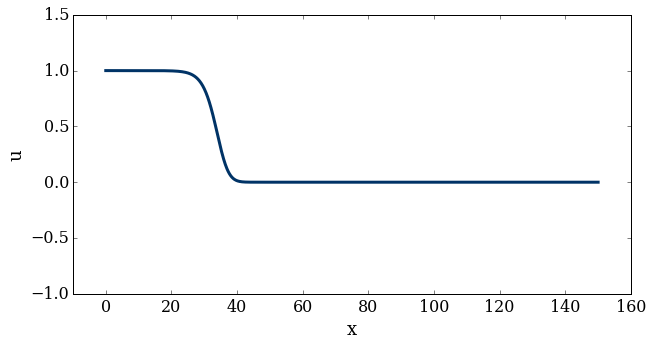

In [7]:
fisher(20,dt)

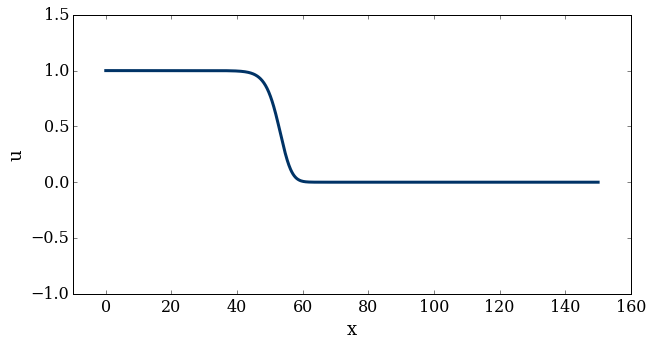

In [8]:
fisher(30,dt)

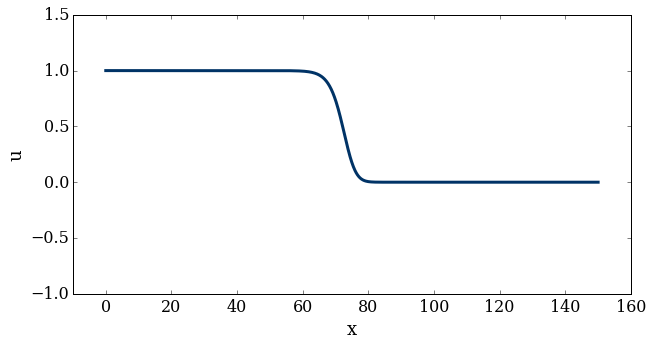

In [9]:
fisher(40,dt)

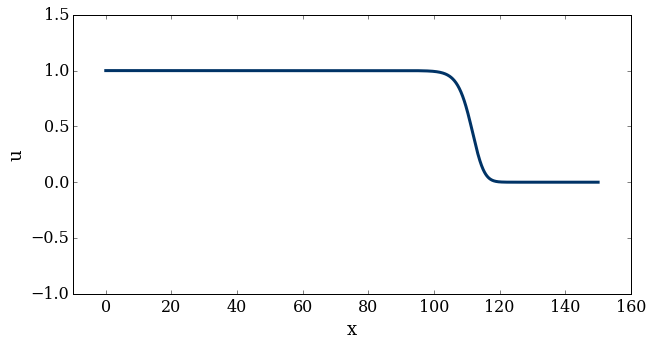

In [10]:
fisher(60,dt)

Observe the figures above, we can find that location of the wave is always at around $x=2T$. It seems that the solution is a wave solution and the wave speed is $2$. However, we will talk about this in the next lesson.


Also, note that the solution on the figure aboves is for the dimensionalized system. When we want to get the solution of the initial variables, we just need to calculate $n(x,t)=Ku(x,t)$, $x=\tilde{x}\sqrt{\frac{\chi}{r}}$, and $t=\frac{\tilde{t}}{r}$.

### Dig deeper

For the non-linear term of the Fisher's equation, we use Patankar scheme and the term is approximated as 
$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=u_{i}^{n}(1-u_{i}^{n+1})
$$
What would happened if this term is approximated as
$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=u_{i}^{n}(1-u_{i}^{n})
$$

## References:

+ Fisher's Equation, Wikipidia, https://en.wikipedia.org/wiki/Fisher%27s_equation
+ Schumacher, Eva.  "Ordinary and Fractional Diffusion in Simple Biological Models." https://www.uclouvain.be/cps/ucl/doc/commission-map/documents/Schumacher_TFE.pdf
